## Cargar librerias

In [27]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os

## Leer una imagen

(168, 299, 3)


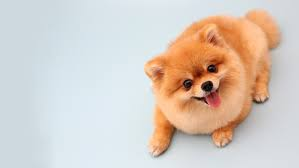

In [28]:
img = cv2.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
print(img.shape) #Numero filas, columnas y colores (RGB)
cv2_imshow(img)
# cv.imshow('perro', img) --> Esto es en python normal

## Reescalar una imagen

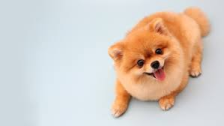

In [29]:
def rescaleFrame (frame, scale = 0.75):
  ancho = int(frame.shape[1]*scale)
  alto = int(frame.shape[0]*scale)
  dimensions = (ancho, alto)

  return cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)

img_rescale = rescaleFrame(img)
cv2_imshow(img_rescale)

## Dibujar sobre la imagen, cambiar color

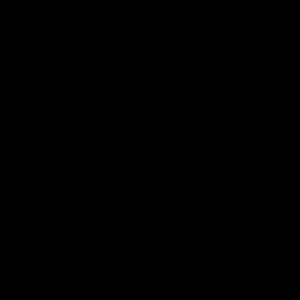

In [30]:
#Generamos una imagen de 300x300 negra
blank = np.zeros((300,300, 3), dtype='uint8')
cv2_imshow(blank)

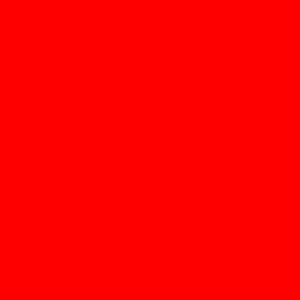

In [31]:
#Podemos ir jugando y cambiandola de color
blank[:] = 0,0,255 #Indicamos que todos los pixeles sean rojos. Podemos pasar la imagen a otro color jugando con los numeros
cv2_imshow(blank)

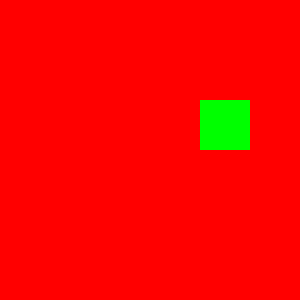

In [32]:
#Podemos colorear solo una parte de la imagen en otro color
blank[100:150, 200:250] = 0,255,0 
cv2_imshow(blank)

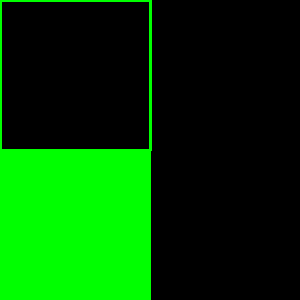

In [33]:
#Podemos pintar un rectangulo
blank = np.zeros((300,300, 3), dtype='uint8') #Defino de nuevo el cuadrado
cv2.rectangle(blank, (0,0), (150,150), (0,255,0), thickness = 2) #Pinto el rectangulo desde donde empieza, la dimension, el color y el grosor de la linea
cv2.rectangle(blank, (150,150), (0,300), (0,255,0), thickness = cv2.FILLED) #Para rellenar el color del rectangulo
cv2_imshow(blank)

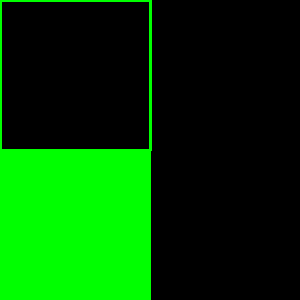

In [34]:
#Puedes hacerlo usando el ancho y el alto de la imagen
cv2.rectangle(blank, (0,0), (blank.shape[0]//2,blank.shape[1]//2), (0,255,0), thickness = 1)
cv2_imshow(blank)

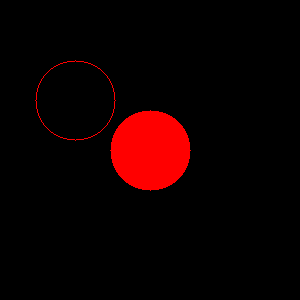

In [35]:
#Pintar un circulo
blank = np.zeros((300,300, 3), dtype='uint8') #Defino de nuevo el cuadrado
cv.circle(blank, (blank.shape[0]//2,blank.shape[1]//2), 40, (0,0,255), thickness = -1) #Imagen, posicion, radio, color y grosor linea -1 para rellenar
cv.circle(blank, (blank.shape[0]//4,blank.shape[1]//3), 40, (0,0,255), thickness = 1) #Imagen, posicion, radio, color y grosor linea -1 para rellenar
cv2_imshow(blank)

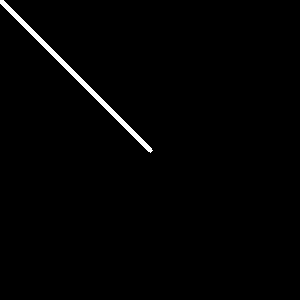

In [36]:
#Pintar una linea
blank = np.zeros((300,300, 3), dtype='uint8') #Defino de nuevo el cuadrado
cv.line(blank, (0,0), (blank.shape[0]//2,blank.shape[1]//2), (255,255,255), thickness = 3) #Imagen, posicion, color(blanco) y grosor linea 
cv2_imshow(blank)

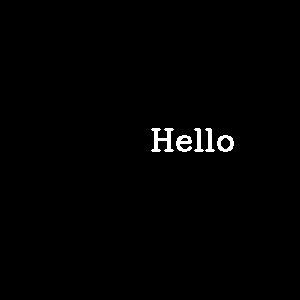

In [37]:
#Para hacer un texto
blank = np.zeros((300,300, 3), dtype='uint8') #Defino de nuevo el cuadrado
cv.putText(blank, 'Hello', (blank.shape[0]//2,blank.shape[1]//2), cv.FONT_HERSHEY_COMPLEX, 1.0, (255,255,255), 2)
cv2_imshow(blank)

## Funciones

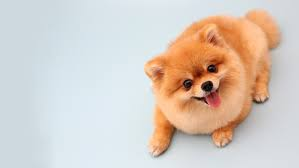

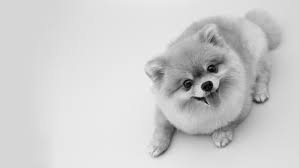

In [38]:
#Convertir una imagen a escala de grises
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

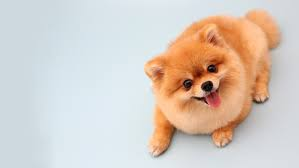

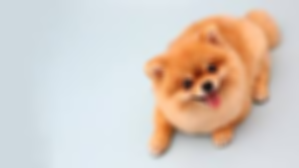

In [39]:
#Distorsionar una imagen
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv2_imshow(blur)

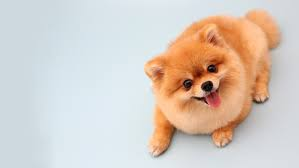

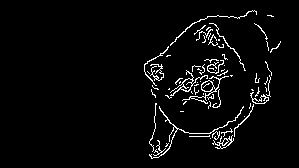

In [40]:
#Dibuja los contornos.
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

canny = cv.Canny(img, 125, 175)
cv2_imshow(canny)

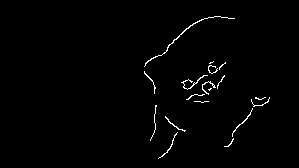

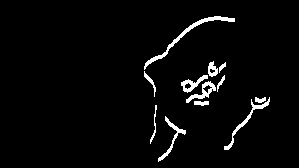

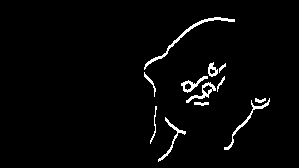

In [41]:
#Se puede jugar con los bordes de los contornos
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)

canny = cv.Canny(blur, 125, 175) #Aplicamos los bordes sobre la imagen difuminada para ayudar a encontrar diferentes patrones
cv2_imshow(canny)

dilated = cv.dilate(canny, (7,7), iterations = 3) #Dilatamos los contornos de la imagen 
cv2_imshow(dilated)

eroded = cv.erode(dilated, (3,3), iterations = 1) #Erosionamos los bordes de la imagen
cv2_imshow(eroded)

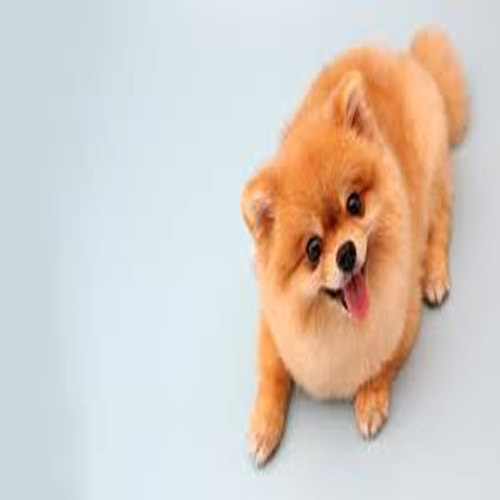

In [42]:
# Reescalar una imagen pero sin importar la resolución
resized = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC) #Es la que mas tarda pero la que más resolución tiene
cv2_imshow(resized)

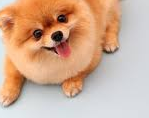

In [43]:
#Recortar una imagen
cropped = img[50:200, 150:300]
cv2_imshow(cropped)

## Transformaciones

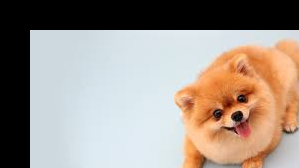

In [44]:
#Transladar
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')

def translate (img, x, y):
  transMat = np.float32([[1,0,x],[0,1,y]])
  dimensions = (img.shape[1], img.shape[0])
  return cv.warpAffine(img, transMat, dimensions)

# -x --> izq
# -y --> arriba
# x --> derecha
# y --> abajo

translated = translate(img, 30, 30)

cv2_imshow(translated)

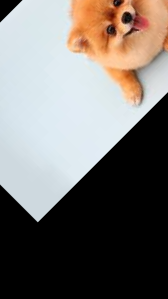

In [45]:
#Rotar
def rotar (img, angulo, rotPoint = None):
  (alto, ancho) = img.shape[:2]

  if rotPoint is None:
    rotPoint = (alto//2, ancho//2)
  
  rotMat = cv.getRotationMatrix2D(rotPoint, angulo, 1.0)
  dimensions = (alto, ancho)

  return cv.warpAffine(img, rotMat, dimensions)

rotated = rotar(img, 45)
cv2_imshow(rotated)

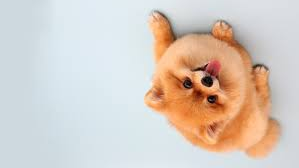

In [46]:
#Dar la vuelta
flip = cv.flip(img, 0) #1 0 ó -1
cv2_imshow(flip)

## Identificar contornos

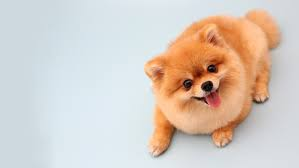

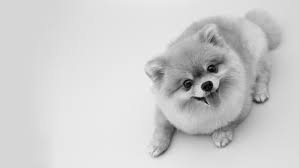

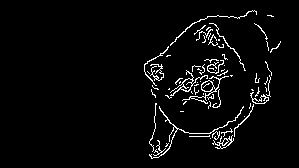

70


In [47]:
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

canny = cv.Canny(img, 125, 175)
cv2_imshow(canny)

contours, hierarchies = cv.findContours (canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(len(contours)) #Pinta el numero de contornos que encuentra en la imagen

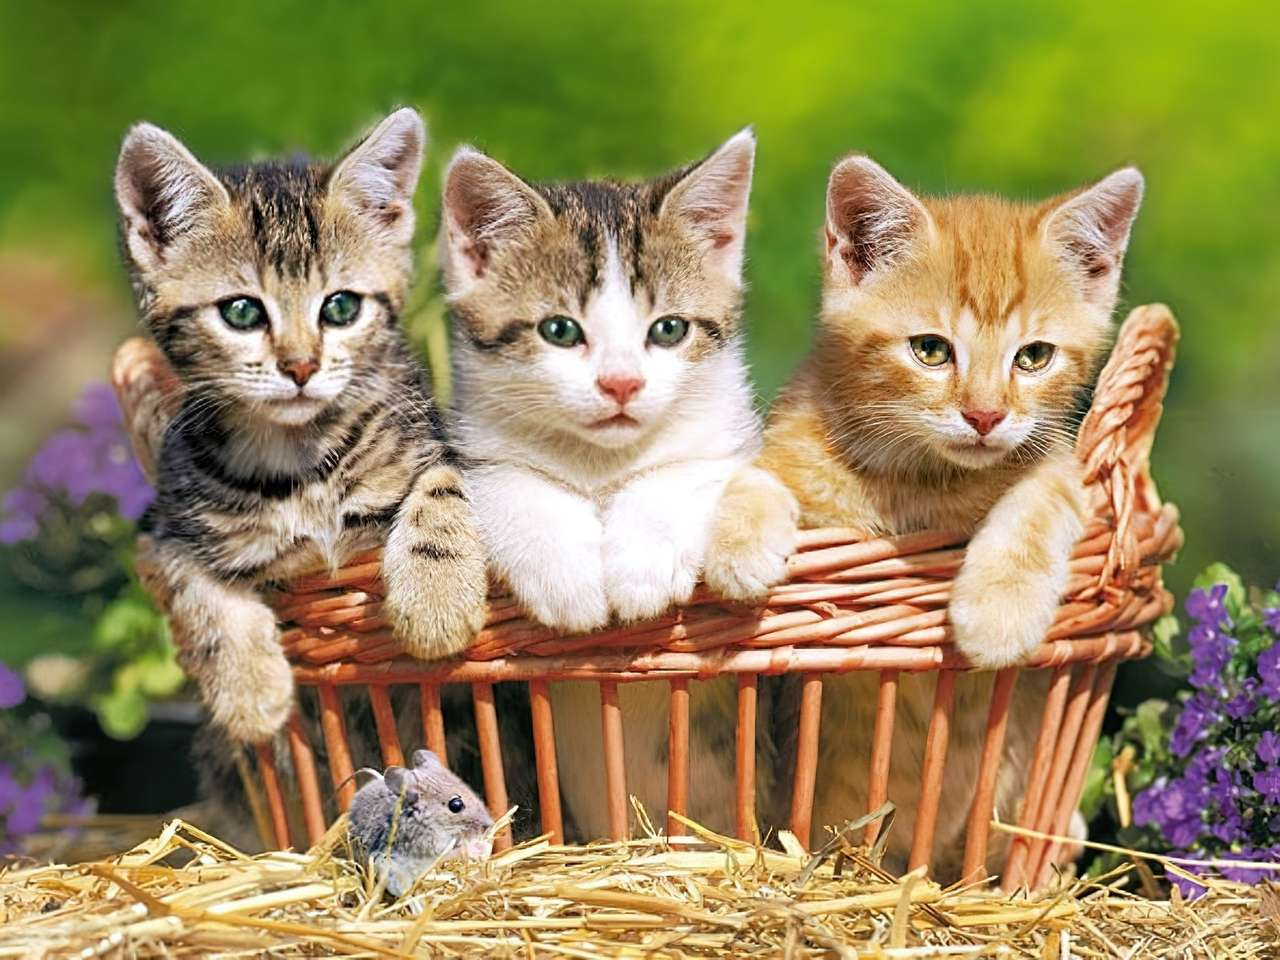

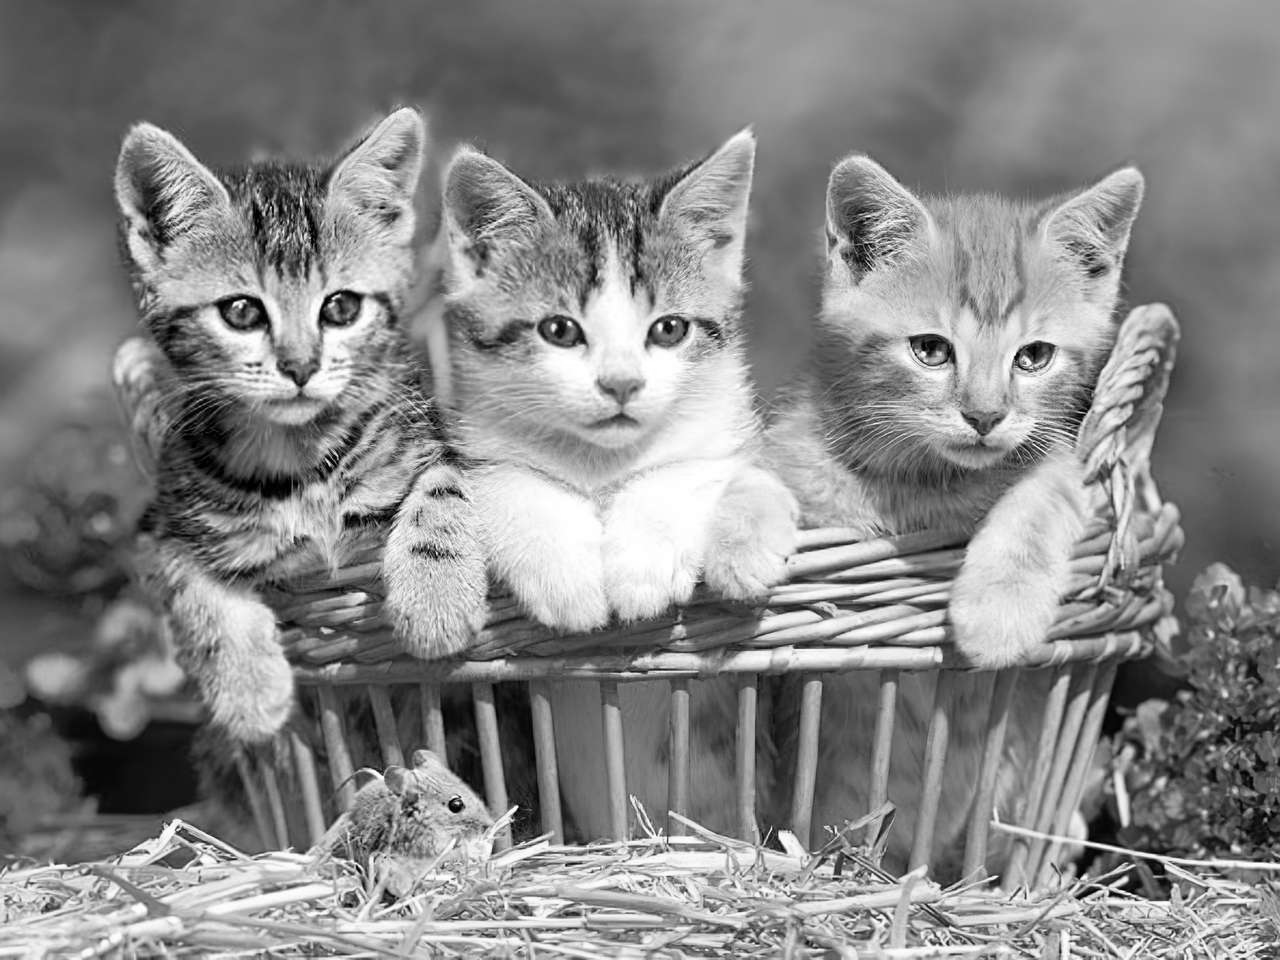

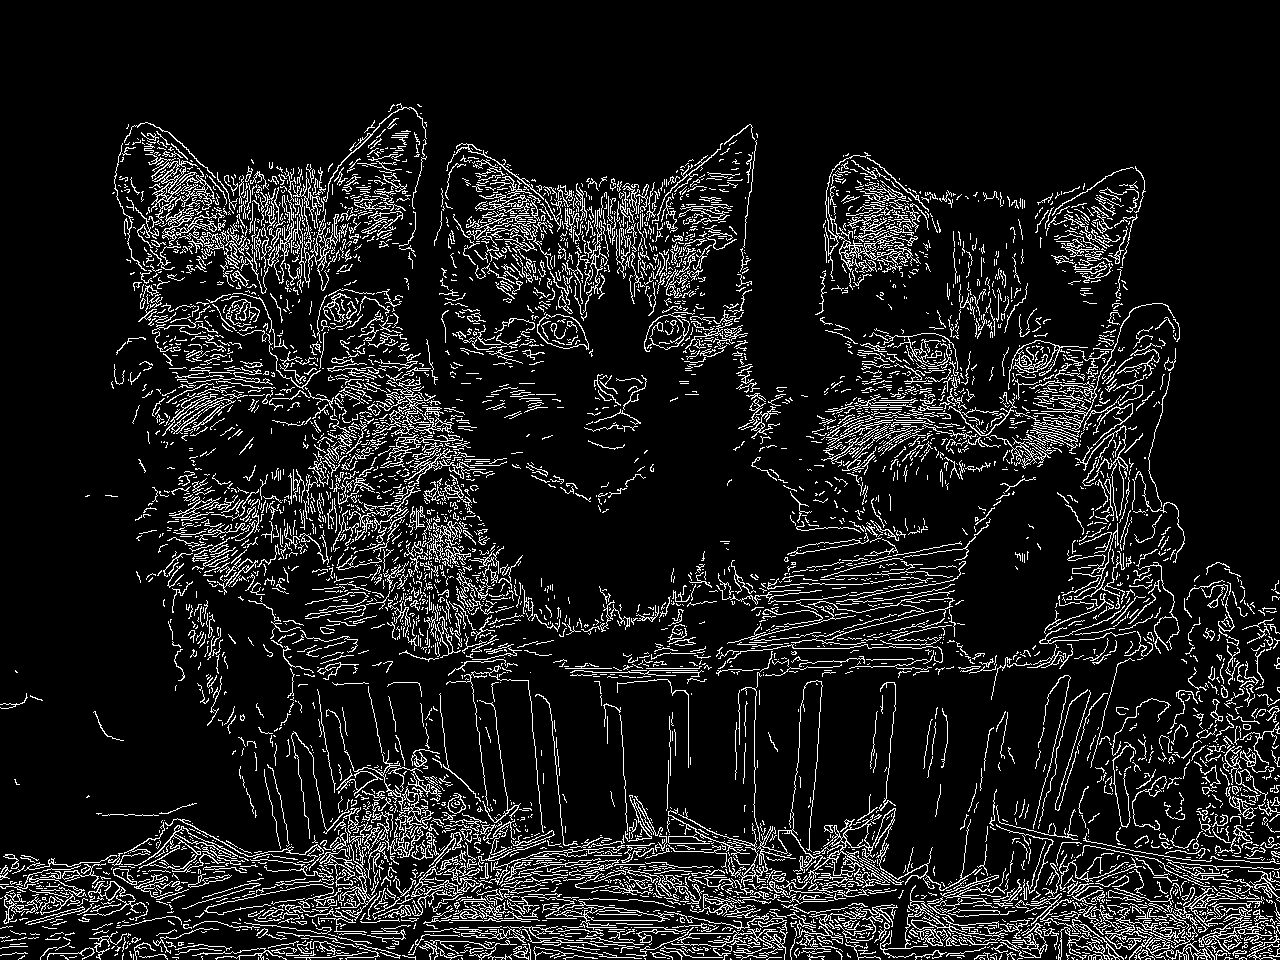

5675


In [48]:
#Aplicamos contornos sobre una nueva imagen
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/gatos.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

canny = cv.Canny(img, 125, 175)
cv2_imshow(canny)

contours, hierarchies = cv.findContours (canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(len(contours)) #Pinta el numero de contornos que encuentra en la imagen

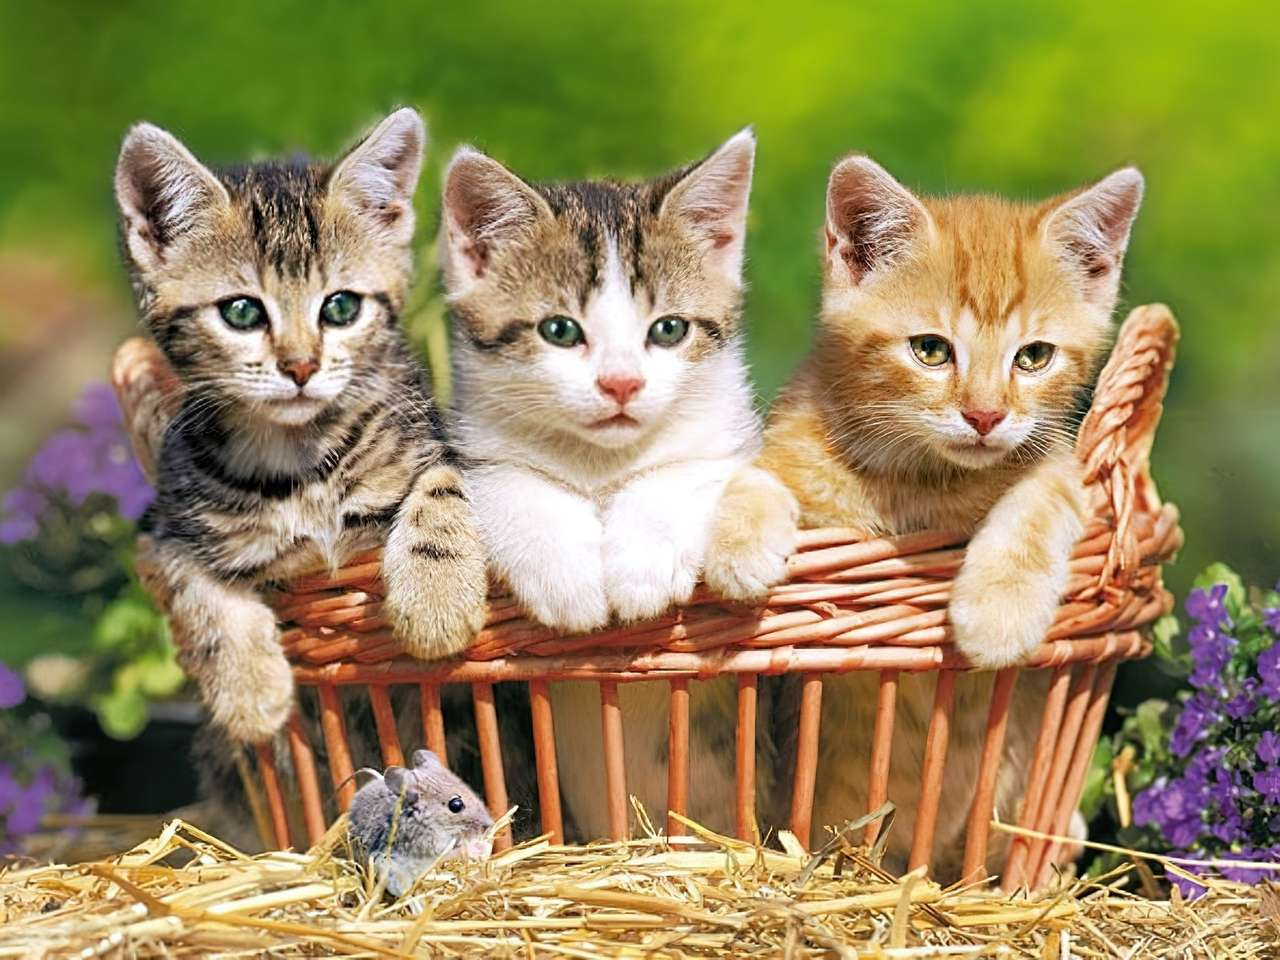

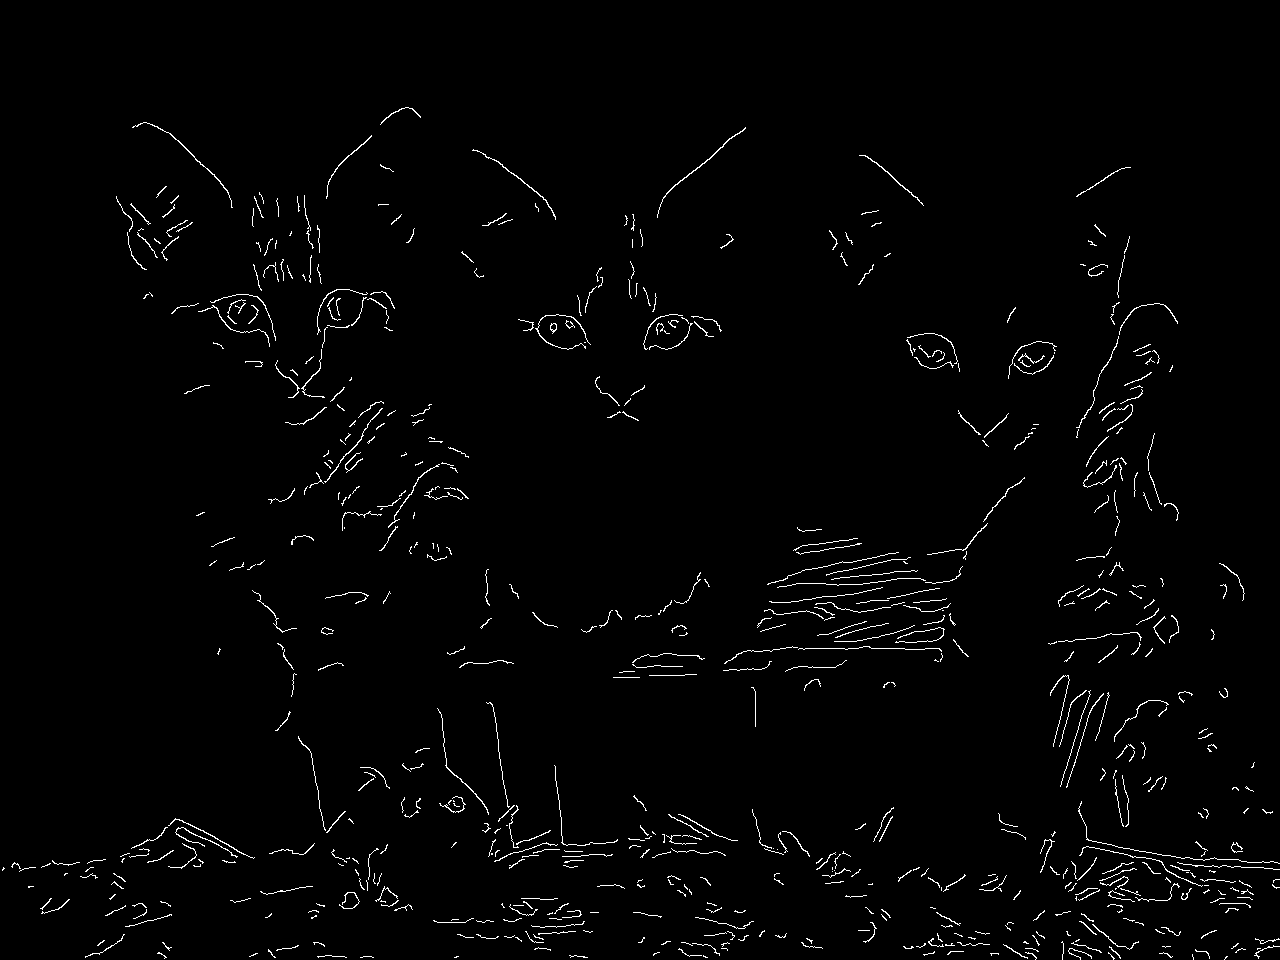

671


In [49]:
#Para poder minimizar el numero de contornos encontrados en la imagen podriamos difuminarla
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/gatos.jpg')
cv2_imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (7,7), cv.BORDER_DEFAULT)
canny = cv.Canny(blur, 125, 175)
cv2_imshow(canny)
contours, hierarchies = cv.findContours (canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(len(contours)) #Son muchos menos contornos los que encuentra. Hemos bajado de 5675 a 671

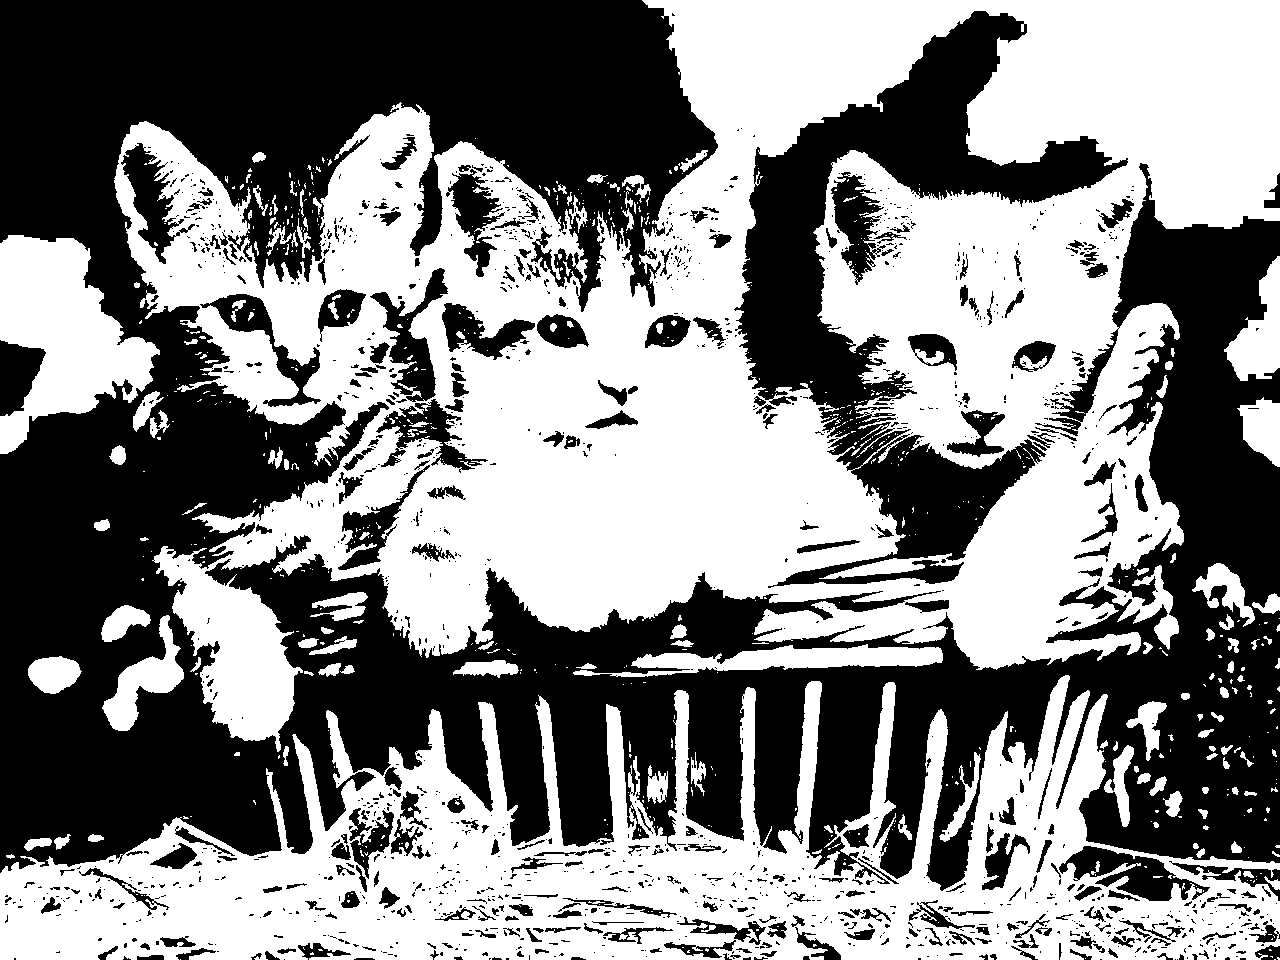

432


In [50]:
#Vamos a binarizarla para poder ver los contornos claros
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/gatos.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY) #Por debajo de 125 lo pasa a 0 (negro) y por encima de 250 a blanco(255)
cv2_imshow(thresh)
contours, hierarchies = cv.findContours (thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contours)) #Son muchos menos contornos los que encuentra. Hemos bajado de 6091 a 432

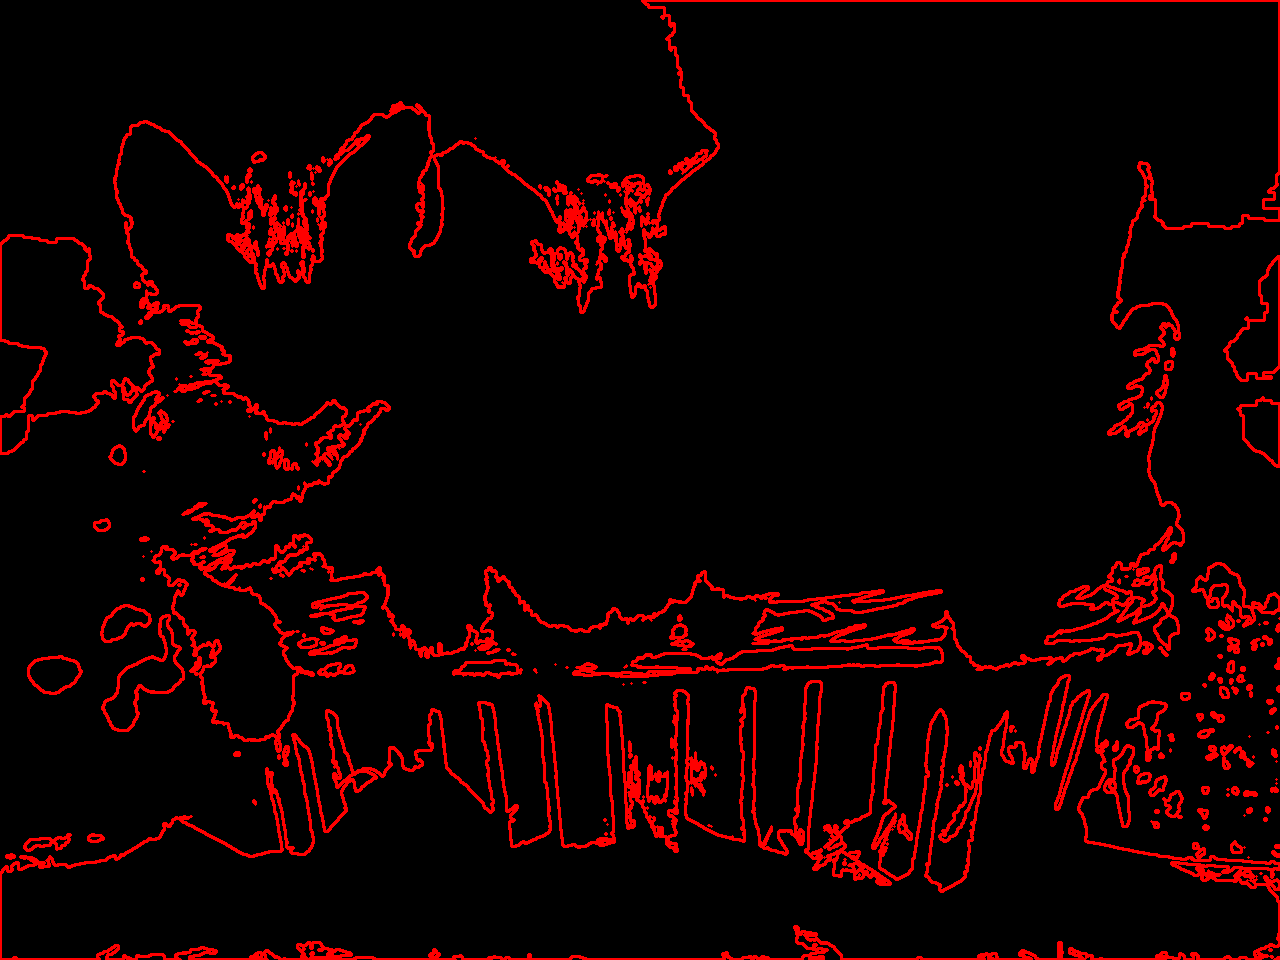

In [51]:
#Vamos a dibujar los contornos en una imagen en blanco para ver realmente cuantos de ellos reconoce
blank = np.zeros((img.shape), dtype='uint8') #Mismas dimensiones

cv.drawContours(blank, contours, -1, (0,0,255), 2)
cv2_imshow(blank)

## Cambiar colores

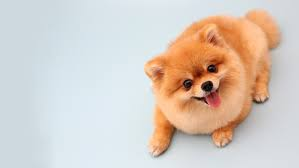

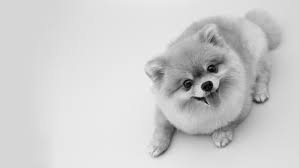

In [52]:
#Pasarlo a escala GRAY
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

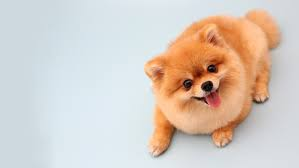

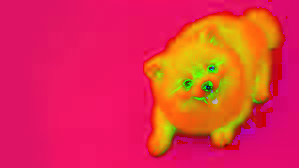

In [53]:
#Pasarlo a escala HSV
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)

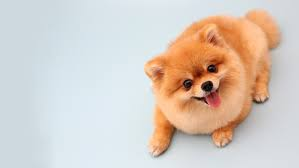

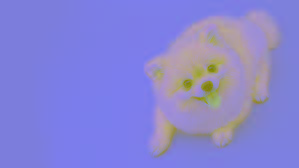

In [54]:
#Pasarlo a escala LAB
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv2_imshow(lab)

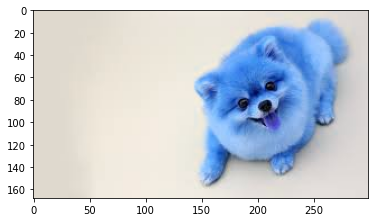

In [55]:
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
plt.imshow(img) #plt lo muestra como una imagen RGB, a la inversa de lo que realmente es (BGR)

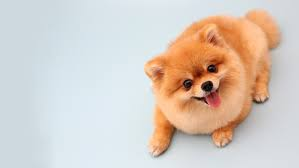

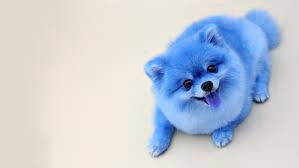

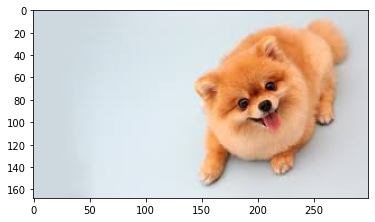

In [56]:
#Pasarlo a escala RGB
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
cv2_imshow(img)

rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(rgb)

plt.imshow(rgb) #Habria que invertir colores para que te muestre con plt la imagen real que estamos viendo

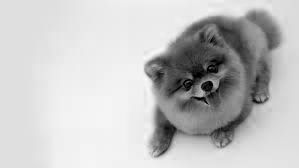

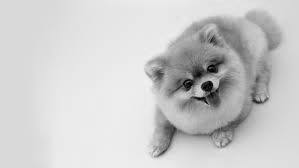

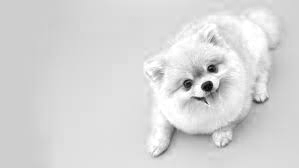

In [57]:
# División de colores
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
b,g,r = cv.split(img)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
#Cada foto representa un color, donde más pixeles de ese color se encuentra es más claro. Cuanto mas se acerque a blanco más concentración de pixeles hay
#Se puede ver como la foto del color rojo es mas clara ya que predomina mas ese color

In [58]:
# Vemos las dimensiones
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)
# La primera imagen tienen el numero 3 que hace referencia a los colores de la foto, las otras tienen solo un unico canal de color

(168, 299, 3)
(168, 299)
(168, 299)
(168, 299)


## Suavizado y desenfoque
###### La imagen se compone de pixeles que actuan como ventanas y dentro de esas ventanas se realiza un suavizado para poder hacer los cambios

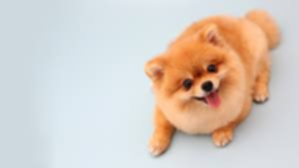

In [59]:
#Desenfoque por la media
media = cv.blur(img, (3,3)) #Definimos el kernel (Ventana) para hacer la media. Cuanto mayor sea mayor será del difuminado
cv2_imshow(media)

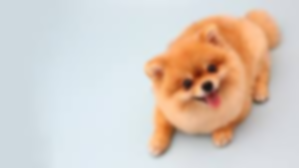

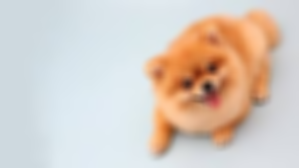

In [60]:
#Desenfoque gausiano
gauss = cv.GaussianBlur(img, (9,9), 0) #Definimos el kernel (Ventana) para hacer la media. Cuanto mayor sea mayor será del difuminado
cv2_imshow(gauss)
media = cv.blur(img, (9,9))
cv2_imshow(media)

#Ligeramente se ve que el metodo gaussiano es mejor que la media

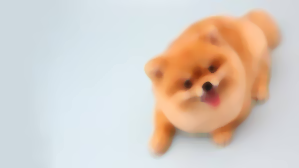

In [61]:
#Desenfoque mediana
mediana = cv.medianBlur(img, 9)
cv2_imshow(mediana)
#Este elimina mejor el ruido que los anteriores

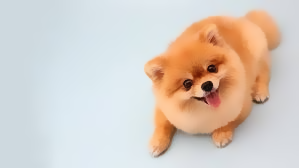

In [62]:
#Desenfoque bilateral
bilateral = cv.bilateralFilter(img, 10, 45, 35) #Imagen, diametro, color sigma, capacidad de otros pixeles en influir en el que estamos viendo
cv2_imshow(bilateral)
#Consiste en la capacidad de que otros pixeles puedan llegar a influir en el pixel que actualmente calculas
#Es el mejor metodo de difuminado

## Superposición de imagen

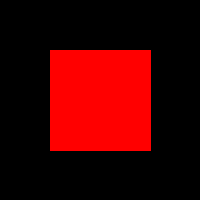

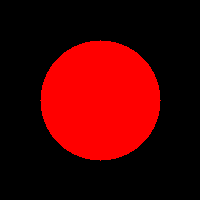

In [63]:
#Generamos un cuadrado y un circulo
blank = np.zeros((200,200, 3), dtype='uint8') #Defino de nuevo el cuadrado
rect = cv.rectangle(blank, (50,50), (150,150), (0,0,255), thickness = -1)
cv2_imshow(rect)
blank = np.zeros((200,200, 3), dtype='uint8') #Defino de nuevo el cuadrado
circle = cv.circle(blank, (100,100), 60, (0,0,255), thickness = -1)
cv2_imshow(circle)

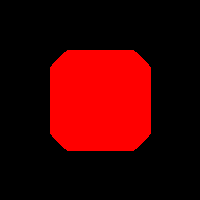

In [64]:
#Superponemos circulo y cuadrado con and solo lo que coincide
bitwise_and = cv.bitwise_and(rect, circle)
cv2_imshow(bitwise_and)

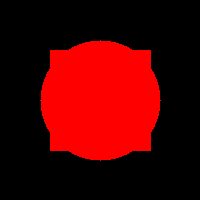

In [65]:
#Superponemos circulo y cuadrado con or, lo que no coincide se pinta tambien
bitwise_or = cv.bitwise_or(rect, circle)
cv2_imshow(bitwise_or)

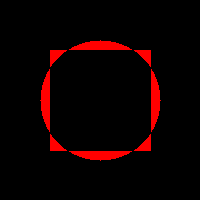

In [66]:
#Superponemos circulo y cuadrado con xor
bitwise_xor = cv.bitwise_xor(rect, circle)
cv2_imshow(bitwise_xor)

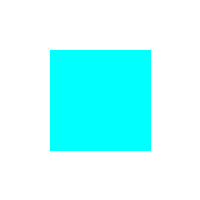

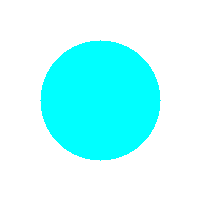

In [67]:
#Invertir colores
bitwise_not = cv.bitwise_not(rect)
cv2_imshow(bitwise_not)

bitwise_not = cv.bitwise_not(circle)
cv2_imshow(bitwise_not)

## Enmascaramiento

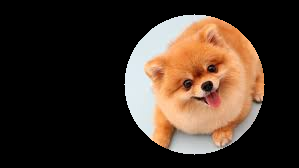

In [68]:
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
blank = np.zeros(img.shape[:2], dtype='uint8')#Debe de ser del mismo tamaño que la imagen original

mask = cv.circle(blank, (img.shape[1]//2 + 45, img.shape[0]//2), 70, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)
cv2_imshow(masked)

## Historgrama para los pixeles

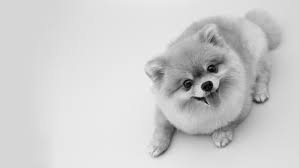

(0.0, 256.0)

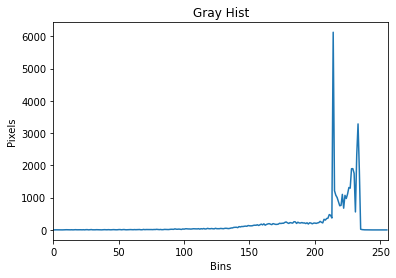

In [69]:
#Para los grises
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])
plt.figure()
plt.title('Gray Hist')
plt.xlabel('Bins')
plt.ylabel('Pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
#Sirve para ver la distribución de los pixeles en la imagen

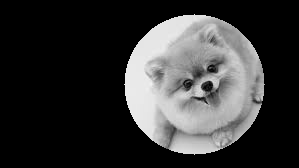

(0.0, 256.0)

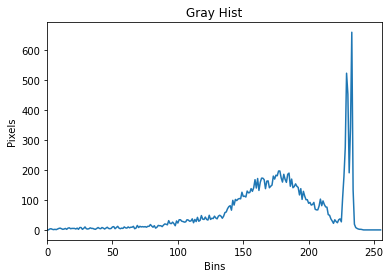

In [70]:
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
blank = np.zeros(img.shape[:2], dtype='uint8')#Debe de ser del mismo tamaño que la imagen original

mask = cv.circle(blank, (img.shape[1]//2 + 45, img.shape[0]//2), 70, 255, -1)

masked = cv.bitwise_and(img, img, mask=mask)

gray = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])
plt.figure()
plt.title('Gray Hist')
plt.xlabel('Bins')
plt.ylabel('Pixels')
plt.plot(gray_hist)
plt.xlim([0,256])


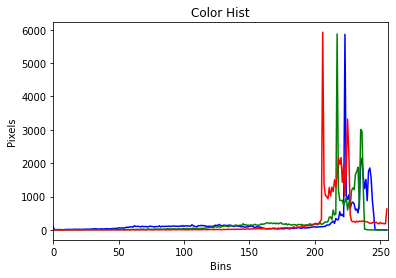

In [71]:
#Para ver la intensidad de los colores
plt.figure()
plt.title('Color Hist')
plt.xlabel('Bins')
plt.ylabel('Pixels')
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
  hist = cv.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist, color = col)
  plt.xlim([0,256])
plt.show()
#Existen 3 picos de colores con diferentes intensidades

## Umbral

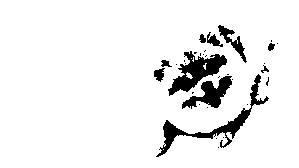

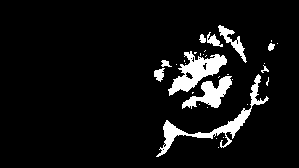

In [72]:
# Umbral simple
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY) #Por debajo de 150 lo convierte en o y por encima en 255. Cuanto mas alto más partes seran negras ya que seran 0
cv2_imshow(thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)# A la inversa 
cv2_imshow(thresh_inv)

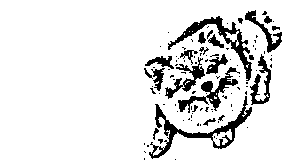

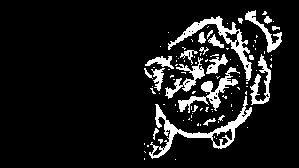

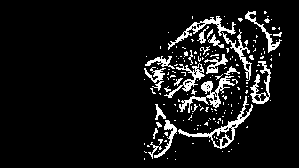

In [73]:
#Umbral adaptativo
adaptative_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3) #Dejas que la maquina adapte el threshold adecuado para hacer la binarización
cv2_imshow(adaptative_thresh)

adaptative_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 3) #Dejas que la maquina adapte el threshold adecuado para hacer la binarización
cv2_imshow(adaptative_thresh)
#Ahora mismo lo estamos haciendo con la media, pero se puede adaptar a Gaussiano
adaptative_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3) #Dejas que la maquina adapte el threshold adecuado para hacer la binarización
cv2_imshow(adaptative_thresh)
#El Gaussiano lo que hace es darle un valor a cada pixel y la media consigue que todos tengan el mismo valor

## Detección de bordes

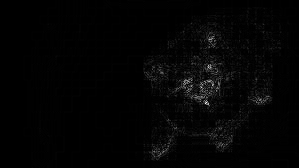

In [74]:
#Laplacian
img = cv.imread(r'/content/drive/MyDrive/Dataset_Modeling/imagen_perro.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

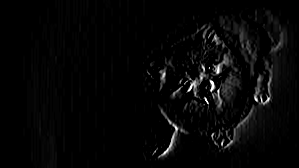

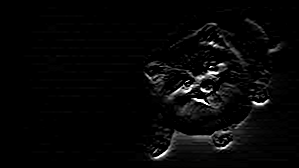

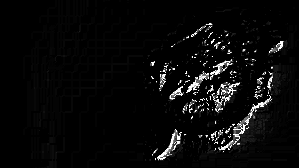

In [75]:
#Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combines_sobel = cv.bitwise_or(sobelx, sobely)

cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(combines_sobel)

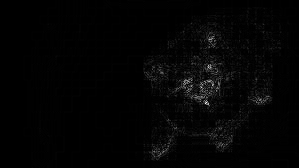

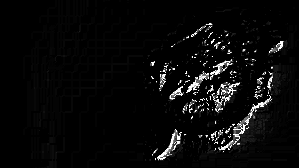

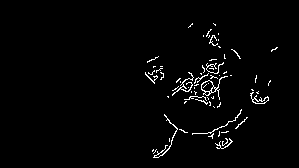

In [76]:
canny = cv.Canny(gray, 150, 175)

cv2_imshow(lap)
cv2_imshow(combines_sobel)
cv2_imshow(canny)